In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/food_truck_data.txt')
df.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [6]:
m = df.Population.size
X = np.append(np.ones((m,1)),df.Population.values.reshape(m,1),axis=1)
y = df.Profit.values.reshape(m,1)
theta = np.ones((2,1))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    J = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y) ** 2)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, theta)
        error = np.dot(X.transpose(), y_pred - y)
        theta -= (alpha / m) * error
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=100)
print(f"h(x) = ({theta[0, 0]}) + ({theta[1, 0]})x1")

h(x) = (0.1669807785208188) + (0.7848851677225066)x1


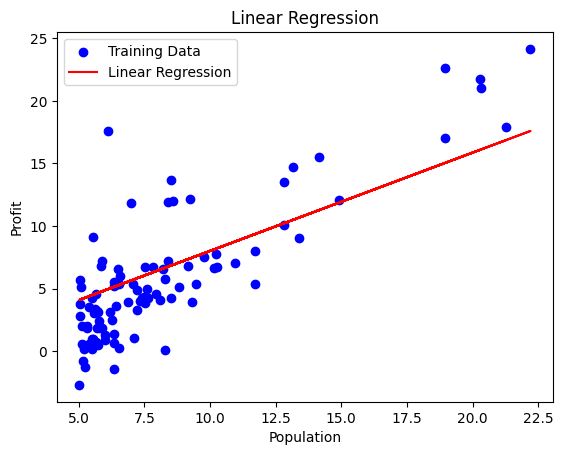

In [9]:
plt.scatter(df.Population, df.Profit, color='blue', label='Training Data')
plt.plot(df.Population, np.dot(X, theta), color='red', label='Linear Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

y_pred_test = np.dot(X_test, theta)
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) on test set:", mse)

Mean Squared Error (MSE) on test set: 11.763409210206449


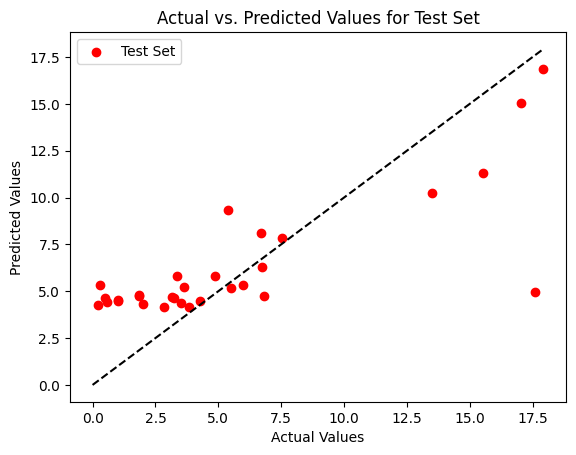

In [15]:
y_pred_test = np.dot(X_test, theta)

plt.scatter(y_test, y_pred_test, color='red', label='Test Set')
max_val = max(np.max(y_test), np.max(y_pred_test))
plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Test Set")
plt.legend()
plt.show()